In [5]:
import pandas as pd
import numpy as np

In [6]:
#List of the encodings to try
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']
file = 'spam.csv'

#attenpt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file,encoding = encoding)
        print(f"File successfully read with encoding : {encoding}")
        break #stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue #Try the next encoding
#If the loop complete without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed. Unable to read thye CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding : latin1
CSV file has been successfully loaded


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3284,ham,They are just making it easy to pay back. I ha...,NaN,NaN,NaN
4278,spam,URGENT. Important information for 02 user. Tod...,NaN,NaN,NaN
2126,ham,You do got a shitload of diamonds though,NaN,NaN,NaN
2024,ham,U having lunch alone? I now so bored...,NaN,NaN,NaN
4778,ham,O we cant see if we can join denis and mina? O...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [11]:
df.sample(5)

,v1,v2
1018,ham,Nope watching tv at home... Not going out. V b...
2870,ham,I actually did for the first time in a while. ...
857,ham,Hai ana tomarrow am coming on morning. &lt;DE...
4839,spam,PRIVATE! Your 2003 Account Statement for shows...
1365,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...


In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
4778,ham,O we cant see if we can join denis and mina? O...
4464,ham,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
4157,ham,It certainly puts things into perspective when...


In [13]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [14]:
df['target'] = encode.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicate values
df.duplicated().sum()

403

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis 

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

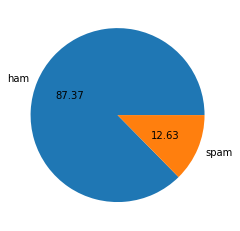

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anupam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)#number of character

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

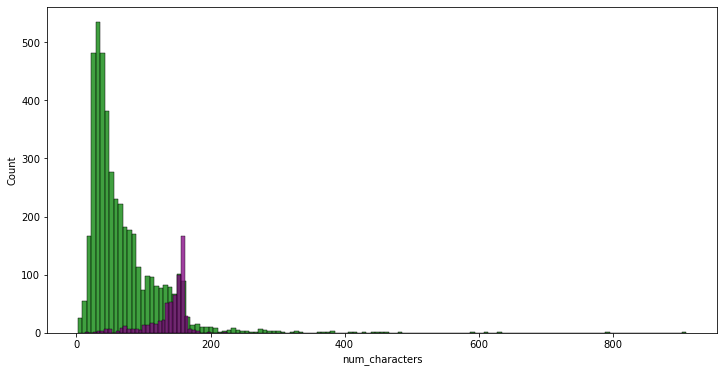

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='purple')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

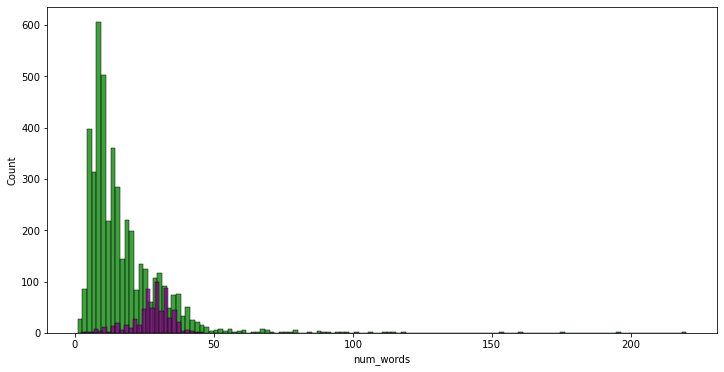

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='purple')

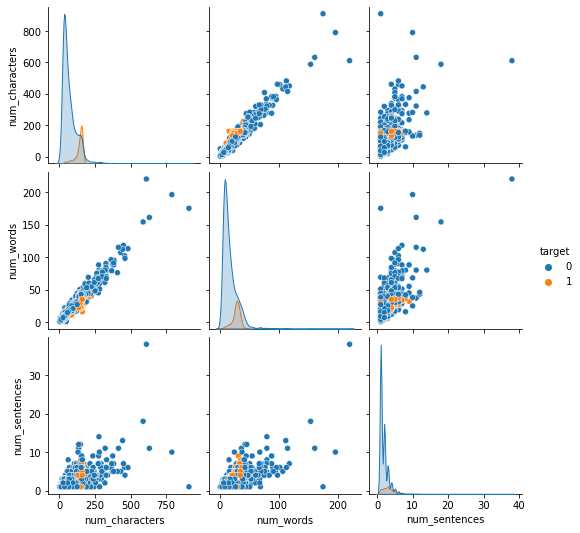

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

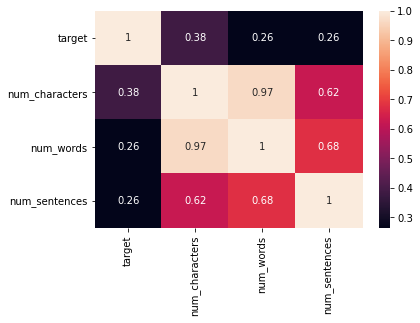

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon")

print(transformed_text)

gon na home soon


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anupam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


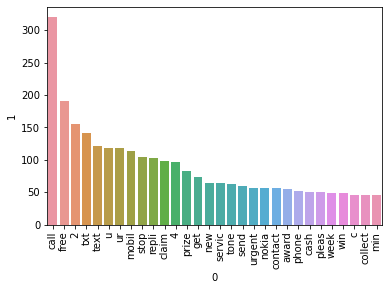

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35404

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


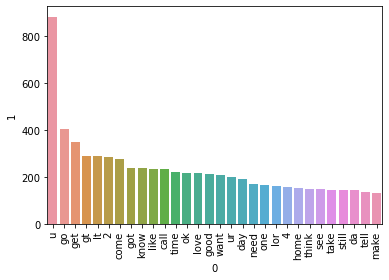

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [107]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [108]:
X.shape

(5169, 3000)

In [109]:
y = df['target'].values

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [112]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [113]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [114]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(X_train,Y_train)
Y_pred3 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
!pip install xgboost

In [77]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KV' : knc,
    'MB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BGC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [80]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print('For : ', name)
    print('Accuracy : ', current_accuracy)
    print('Precision : ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For :  SVC
Accuracy :  0.9758220502901354
Precision :  0.9747899159663865
For :  KV
Accuracy :  0.9052224371373307
Precision :  1.0
For :  MB
Accuracy :  0.9709864603481625
Precision :  1.0
For :  DT
Accuracy :  0.9487427466150871
Precision :  0.8148148148148148
For :  LR
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703
For :  RF
Accuracy :  0.9758220502901354
Precision :  0.9829059829059829
For :  AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
For :  BGC
Accuracy :  0.9584139264990329
Precision :  0.8682170542635659
For :  ETC
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406
For :  GBDT
Accuracy :  0.9468085106382979
Precision :  0.9191919191919192
For :  XGB
Accuracy :  0.9671179883945842
Precision :  0.9262295081967213


In [83]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KV,0.905222,1.000000
2,MB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BGC,0.958414,0.868217


In [85]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [86]:
performance_df1

,Algorithm,variable,value
0,KV,Accuracy,0.905222
1,MB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,XGB,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BGC,Accuracy,0.958414


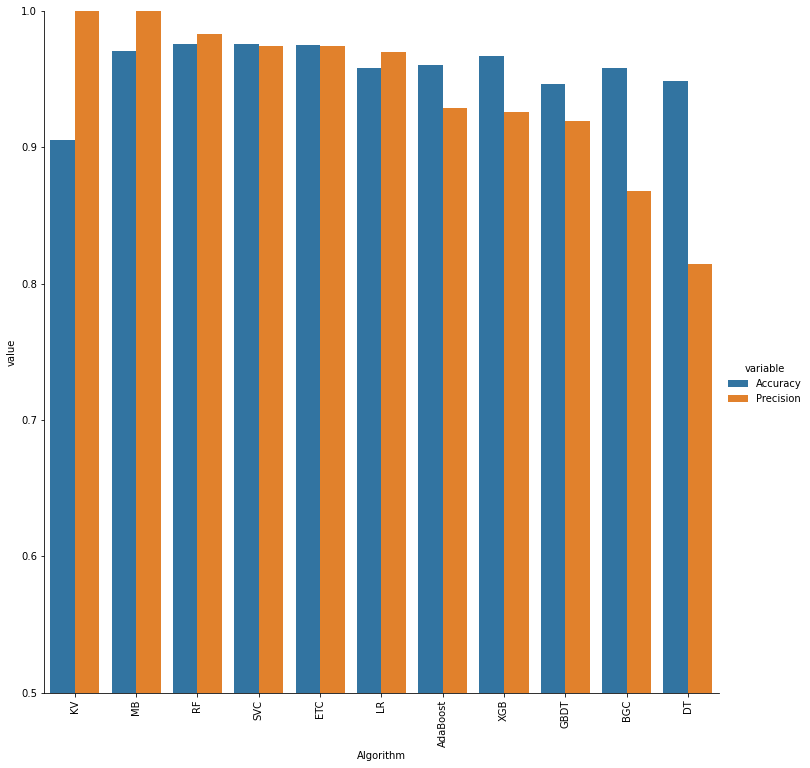

In [87]:
sns.catplot(x= 'Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=10)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000' : accuracy_scores,'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars' : accuracy_scores,'Precision_num_chars' : precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KV,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,MB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BGC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [93]:
svc = SVC(kernel='sigmoid', gamma = 1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [94]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [96]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier


In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator = final_estimator)

In [99]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [101]:
# import pickle
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB

# #Sample text dta and corresponding labels
# X_train = ['Sample text 1','Sample text 2','Sample text 3']
# Y_train = [0,1,0]

# #Create and train the TF-IDF vectorizer
# tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
# X_train_tfidf = tfidf.fit_transform(X_train)

# #Create and train the Naive Bayes Classifier
# mnb = MultinomialNB()
# mnb.fit(X_train_tfidf,Y_train)

# #Save the trained TF-IDF vectorizer and Naive Bayes model to files
# with open('vectorizer.pkl','wb') as vectorizer_file:
#     pickle.dump(tfidf,vectorizer_file)
# with open('model.pkl','wb') as model_file:
#     pickle.dump(mnb,model_file)

In [102]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
